zmien numer w .h5 i .json
zmien numer w wykresach

## The Data

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pylab
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
import pickle

import warnings #usuniecie ostrzezen
warnings.filterwarnings("ignore")

In [2]:
#liczenie czasu
import time

start = time.time()



In [3]:
#wczytanie danych csv
dane = pd.read_csv('daneT800-1500K.csv', sep = ";")
array = dane.values

In [5]:
#wizualizacja danych
dane.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
T,77616.0,1100.000000,200.001288,800.000000,900.000000,1100.000000,1300.000000,1400.000000
VF,77616.0,0.500000,0.200001,0.200000,0.300000,0.500000,0.700000,0.800000
Tr,77616.0,13.500000,6.922231,2.000000,7.750000,13.500000,19.250000,25.000000
l_tpb,77616.0,5.500000,1.707836,3.000000,4.000000,5.500000,7.000000,8.000000
E,77616.0,0.241622,0.217229,0.029615,0.100339,0.167297,0.307292,2.174071
i,77616.0,0.150000,0.094869,0.000000,0.060000,0.150000,0.240000,0.300000
Cd,77616.0,10057.806008,20500.200018,0.000000,80.596965,1420.647118,10104.607644,306611.420013


In [6]:
#dane wejsciowe, upuszczenie ostatniej kolumny- wyjscia, wizualizacja
x_data = dane.drop(['Cd'],axis=1)
x_data

,T,VF,Tr,l_tpb,E,i
0,800,0.2,2,3,1.087036,0.00
1,800,0.2,2,3,1.087036,0.03
2,800,0.2,2,3,1.087036,0.06
3,800,0.2,2,3,1.087036,0.09
4,800,0.2,2,3,1.087036,0.12
5,800,0.2,2,3,1.087036,0.15
6,800,0.2,2,3,1.087036,0.18
7,800,0.2,2,3,1.087036,0.21
8,800,0.2,2,3,1.087036,0.24
9,800,0.2,2,3,1.087036,0.27


In [7]:
#wyjscie
y_val = dane[['Cd']].as_matrix()

In [8]:
#skalowanie danych
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scalerx = scaler.fit(x_data)
x_data = scaler.transform(x_data)

#dataframe z zaznaczeniem kolumn, wizualizacja
x_data=pd.DataFrame(x_data, columns=['T','VF',  'Tr','l_tpb','E',  'i'])
x_data

,T,VF,Tr,l_tpb,E,i
0,0.0,0.0,0.0,0.0,0.493095,0.0
1,0.0,0.0,0.0,0.0,0.493095,0.1
2,0.0,0.0,0.0,0.0,0.493095,0.2
3,0.0,0.0,0.0,0.0,0.493095,0.3
4,0.0,0.0,0.0,0.0,0.493095,0.4
5,0.0,0.0,0.0,0.0,0.493095,0.5
6,0.0,0.0,0.0,0.0,0.493095,0.6
7,0.0,0.0,0.0,0.0,0.493095,0.7
8,0.0,0.0,0.0,0.0,0.493095,0.8
9,0.0,0.0,0.0,0.0,0.493095,0.9


In [10]:
#podzial danych na dane testowe i do nauki, dane testowe to 30% zbioru, random_state to Pseudo-random number
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data,y_val,test_size=0.3,random_state=101)

In [11]:
#wizualizacja danych
X_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
T,23285.0,0.500565,0.333921,0.0,0.166667,0.500000,0.833333,1.0
VF,23285.0,0.503436,0.333706,0.0,0.166667,0.500000,0.833333,1.0
Tr,23285.0,0.499932,0.300445,0.0,0.260870,0.478261,0.739130,1.0
l_tpb,23285.0,0.501318,0.342440,0.0,0.200000,0.600000,0.800000,1.0
E,23285.0,0.099131,0.102382,0.0,0.032877,0.063931,0.129486,1.0
i,23285.0,0.498677,0.315227,0.0,0.200000,0.500000,0.800000,1.0


In [12]:
X_test1 = X_test.as_matrix()

In [13]:
#wizualizacja danych
X_tst = scalerx.inverse_transform(X_test1)
X_tst = pd.DataFrame(X_tst)
X_tst.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,23285.0,1100.339274,200.352648,800.000000,900.000000,1100.000000,1300.000000,1400.000000
1,23285.0,0.502061,0.200223,0.200000,0.300000,0.500000,0.700000,0.800000
2,23285.0,13.498432,6.910238,2.000000,8.000000,13.000000,19.000000,25.000000
3,23285.0,5.506592,1.712202,3.000000,4.000000,6.000000,7.000000,8.000000
4,23285.0,0.242198,0.219553,0.029615,0.100117,0.166712,0.307292,2.174071
5,23285.0,0.149603,0.094568,0.000000,0.060000,0.150000,0.240000,0.300000


In [14]:
#wizualziacja danych
dane.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
T,77616.0,1100.000000,200.001288,800.000000,900.000000,1100.000000,1300.000000,1400.000000
VF,77616.0,0.500000,0.200001,0.200000,0.300000,0.500000,0.700000,0.800000
Tr,77616.0,13.500000,6.922231,2.000000,7.750000,13.500000,19.250000,25.000000
l_tpb,77616.0,5.500000,1.707836,3.000000,4.000000,5.500000,7.000000,8.000000
E,77616.0,0.241622,0.217229,0.029615,0.100339,0.167297,0.307292,2.174071
i,77616.0,0.150000,0.094869,0.000000,0.060000,0.150000,0.240000,0.300000
Cd,77616.0,10057.806008,20500.200018,0.000000,80.596965,1420.647118,10104.607644,306611.420013


In [16]:
#porownanie
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_absolute_error
''''
Args:
n_estimators (int): Liczba etapów boosting do wykonania. 
max_depth (int): maksymalna głębokość poszczególnych estymatorów. 
Maksymalna głębokość ogranicza liczbę węzłów w drzewie. 
min_samples_split (int): Minimalna liczba próbek wymaganych do podziału wewnętrznego węzła
learning_rate (int):Szybkość uczenia się zmniejsza udział każdego drzewa o współczynnik uczenia się
loss (: {‘ls’, ‘lad’, ‘huber’, ‘quantile’}) 
''''

#parametry algorytmu 1
n_estimators = 500
max_depth = 9
min_samples_split = 4
learning_rate = 0.3
loss = 'ls'
#porownanie algorytmu 2
n_estimators1 = 500
max_depth1 = 9
min_samples_split1 = 4
learning_rate1 = 0.3
loss1 = 'lad'
#wczytanie parametrow    
parameters1 = {'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_split': min_samples_split,
          'learning_rate': learning_rate, 'loss': loss}
parameters2 = {'n_estimators': n_estimators1, 'max_depth': max_depth1, 'min_samples_split': min_samples_split1,
          'learning_rate': learning_rate1, 'loss': loss1}
#podanie do algorytmu
estimator1 = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, 
                                      min_samples_split=min_samples_split, loss=loss)
estimator2 = GradientBoostingRegressor(n_estimators=n_estimators1, max_depth=max_depth1, learning_rate=learning_rate1, 
                                      min_samples_split=min_samples_split1, loss=loss1)
clf1 = ensemble.GradientBoostingRegressor(**parameters1)
clf2 = ensemble.GradientBoostingRegressor(**parameters2)
#fitowanie danych do algorytmu
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
#blad
ab1 = mean_absolute_error(y_test, clf1.predict(X_test))
ab2 = mean_absolute_error(y_test, clf2.predict(X_test))
#loss function, blad
train_sizes1, train_scores1, test_scores1 = learning_curve(estimator1, X_train, y_train, cv=9, train_sizes = np.linspace(0.1, 1.0, 20))
train_sizes2, train_scores2, test_scores2 = learning_curve(estimator2, X_train, y_train, cv=9, train_sizes = np.linspace(0.1, 1.0, 20))

print("MAE: %.4f" % ab1)
print("MAE: %.4f" % ab2)


MAE: 243.3561
MAE: 438.6467


In [17]:
def plot_history(train_sizes1, train_scores1, test_scores1, train_sizes2, train_scores2, test_scores2):
'''' 
    Args:
    train_sizes1 ( array, shape (n_unique_ticks,), dtype int): Liczba przykładów, które zostały użyte do wygenerowania krzywej
    train_scores1 (array, shape (n_ticks, n_cv_folds)): Wyniki na zestawach treningowych
    test_scores1 (array, shape (n_ticks, n_cv_folds)): Wyniki na zestawach testowych
    train_sizes2 ( array, shape (n_unique_ticks,), dtype int)
    train_scores2 (array, shape (n_ticks, n_cv_folds))
    test_scores2 (array, shape (n_ticks, n_cv_folds))
''''

    
    
    train_scores_mean1 = np.mean(list(train_scores1), axis=1)
    
    test_scores_mean1 = np.mean(list(test_scores1), axis=1)
   
    train_scores_mean2 = np.mean(list(train_scores2), axis=1)
    
    test_scores_mean2 = np.mean(list(test_scores2), axis=1)
    
    
    
    plt.style.use('classic')
    plt.figure(figsize=(10,5), facecolor='white')
    plt.xlabel("Epochs", fontsize = 15)
    plt.ylabel("Średni błąd", fontsize = 15)
    plt.plot(list(train_sizes1),1 - train_scores_mean1, '--', color="b",
                 label="Dane uczące model ML BGR nr. 1")
    plt.plot(list(train_sizes1),1 - test_scores_mean1, '-', color="g",
                 label="Dane walidacyjne model ML BGR nr. 1")
    plt.plot(list(train_sizes2), 1 - test_scores_mean2, '-', color="r",
                 label="Dane walidacyjne model ML BGR nr. 2")
    plt.plot(list(train_sizes2), 1 - train_scores_mean2, '--', color="k",
                 label="Dane uczące model ML BGR nr. 2")
    
    plt.legend(['Dane uczące model ML BGR nr. 1', 'Dane walidacyjne model ML BGR nr. 1'
               , 'Dane uczące model ML BGR nr. 2', 'Dane walidacyjne model ML BGR nr. 2'], loc = 2, frameon= True)
    
    plt.grid(True)
             
    

    plt.legend(loc="best")
    
    plt.plot()
    

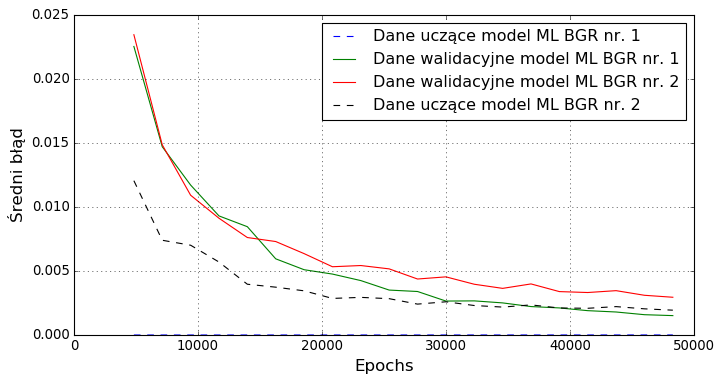

In [18]:
plot_history(train_sizes1, train_scores1, test_scores1, train_sizes2, train_scores2, test_scores2)
plt.savefig('C:\\Users\\Ola\\Desktop\\praca magisterska\\wykresy/porownanieGBR_10.png')

In [19]:
def plot_importance (n_estimators, max_depth, min_samples_split,learning_rate, loss, 
           n_estimators1, max_depth1, min_samples_split1, learning_rate1, loss1):
''''
    Args:
    n_estimators (int): Liczba etapów boosting do wykonania. 
    max_depth (int): maksymalna głębokość poszczególnych estymatorów. 
    Maksymalna głębokość ogranicza liczbę węzłów w drzewie. 
    min_samples_split (int): Minimalna liczba próbek wymaganych do podziału wewnętrznego węzła
    learning_rate (int):Szybkość uczenia się zmniejsza udział każdego drzewa o współczynnik uczenia się
    loss (: {‘ls’, ‘lad’, ‘huber’, ‘quantile’}) 
''''
    
    objects = ('T', 'VF', 'Tr', 'l_tpb', 'E', 'i')
    y_pos = np.arange(len(objects))
    performance1 = clf1.feature_importances_*100
    performance2 = clf2.feature_importances_*100
    plt.style.use('classic')
    plt.figure(figsize=(10,5), facecolor='white')
    bar_width = 0.35
    plt.bar(y_pos, performance1, bar_width, alpha=1, color = 'b', label = 'Model ML GBR nr. 1')
    plt.bar(y_pos+bar_width, performance2, bar_width, alpha=1, color = 'g', label = 'Model ML GBR nr. 2')
    plt.xticks(y_pos+bar_width/2, objects)
    plt.ylabel('Istotność', fontsize ='15')
    plt.title('Istotność atrybutów zbioru danych', fontsize = '20')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print (clf1.feature_importances_*100, clf2.feature_importances_*100)

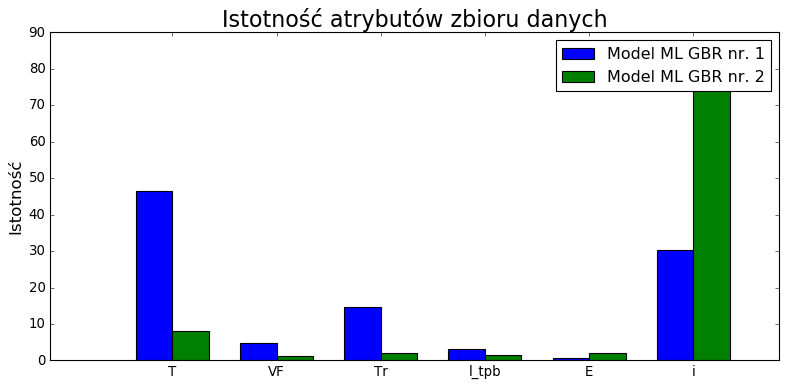

[46.55337142  4.77446147 14.7268959   3.03809112  0.61919542 30.28798466] [ 8.19900627  1.3353501   2.13423435  1.46651169  1.95768802 84.90720958]


<Figure size 640x480 with 0 Axes>

In [20]:
plot_importance (n_estimators, max_depth, min_samples_split,learning_rate, loss, 
           n_estimators1, max_depth1, min_samples_split1, learning_rate1, loss1)
plt.savefig('C:\\Users\\Ola\\Desktop\\praca magisterska\\wykresy/istotosc_atrybotow_zbioru_loss1.jpg')


## porównanie


In [ ]:
#zapisanie do pickle
import pickle

pkl_filename = "C:\\Users\\Ola\\Desktop\\praca magisterska\\wykresy/model19.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(clf, file)
pkl_filename = "C:\\Users\\Ola\\Desktop\\praca magisterska\\wykresy/model20.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(clf1, file)
